# Pre-processing Housing Price dataset

In [21]:
import pandas as pd

df = pd.read_csv("housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 1. Standardization

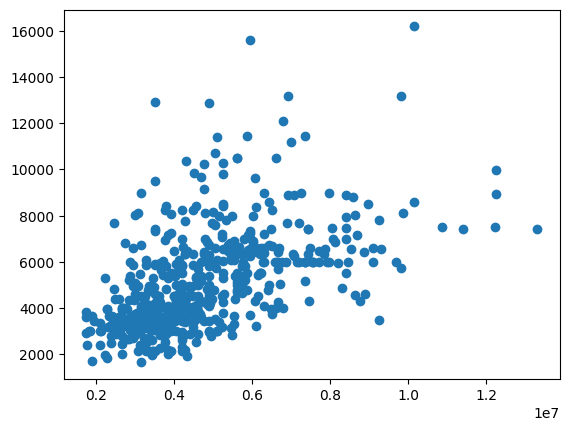

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df["price"], df["area"])

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns = ["price", "area"]

df_std = df.copy()

df_std[columns] = scaler.fit_transform(df[columns])

print(df_std["price"])
print(df_std["area"])

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: price, Length: 545, dtype: float64
0      1.046726
1      1.757010
2      2.218232
3      1.083624
4      1.046726
         ...   
540   -0.991879
541   -1.268613
542   -0.705921
543   -1.033389
544   -0.599839
Name: area, Length: 545, dtype: float64


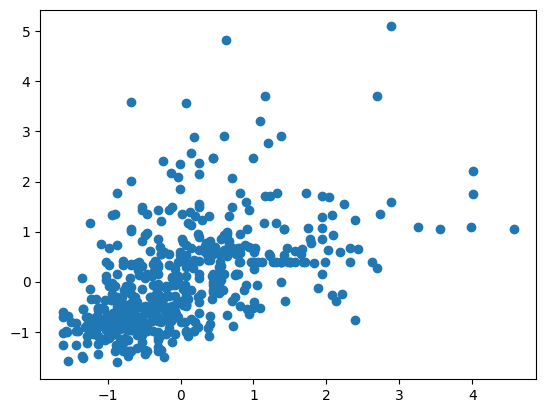

In [25]:
plt.scatter(df_std["price"], df_std["area"])

The plot after standarization both variables are in similar dimensions, show a somewhat linear correlation.

# 2. Log normalization

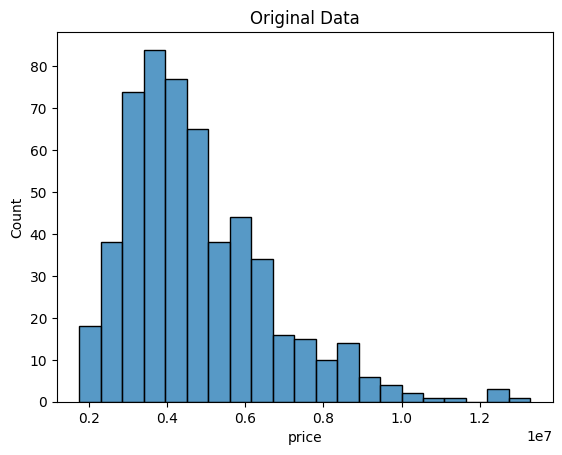

0      16.403275
1      16.321036
2      16.321036
3      16.318175
4      16.250001
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: price, Length: 545, dtype: float64


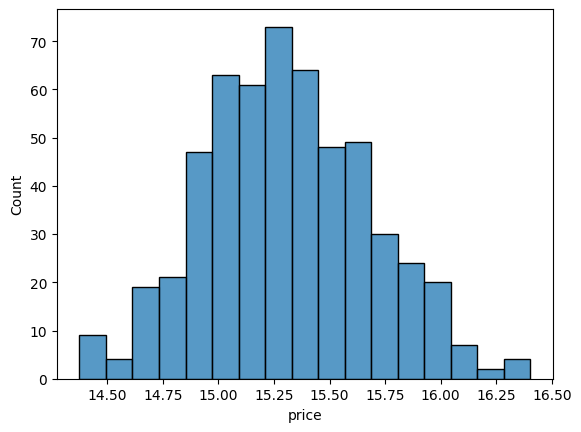

In [26]:
import numpy as np
import seaborn as sns

df_norm_log = df.copy()

df_norm_log["price"] = np.log(df["price"])

sns.histplot(df["price"])
plt.title("Original Data")
plt.show()
sns.histplot(df_norm_log["price"])

print(df_norm_log["price"])

# 3. Outlier handling

### Original data with outliers

Mean:
4766729.247706422
Median:
4340000.0


<Axes: ylabel='price'>

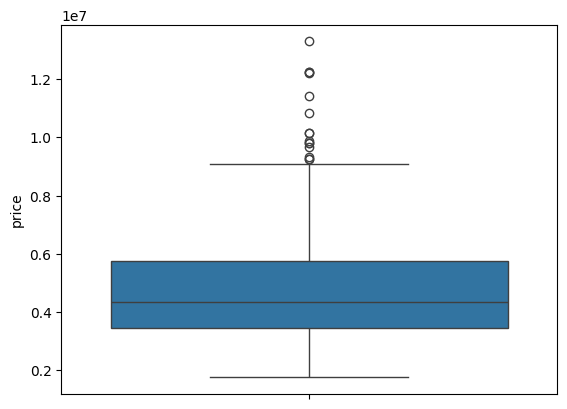

In [27]:
print("Mean:")
print(np.mean(df["price"]))
print("Median:")
print(np.median(df["price"]))

sns.boxplot(df["price"])

In [28]:
q3 = np.quantile(df["price"], 0.75)
q1 = np.quantile(df["price"], 0.25)
iqr = q3 - q1

lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

print(iqr)

print("\nOutliers:")
print(df[df["price"] < lower_range].price)
print(df[df["price"] > upper_range].price)

2310000.0

Outliers:
Series([], Name: price, dtype: int64)
0     13300000
1     12250000
2     12250000
3     12215000
4     11410000
5     10850000
6     10150000
7     10150000
8      9870000
9      9800000
10     9800000
11     9681000
12     9310000
13     9240000
14     9240000
Name: price, dtype: int64


9100000
True
Mean:
4600663.094339622
Median:
4270000.0


<Axes: ylabel='price'>

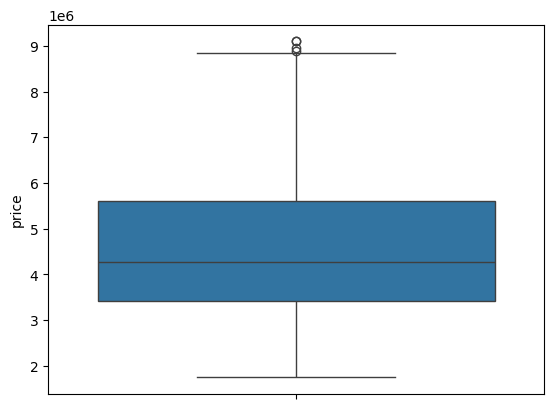

In [29]:
price =  df["price"]

price_no_outliers = price[(price <= upper_range) & (price >= lower_range)]
print(max(price_no_outliers))
print(max(price_no_outliers) <= upper_range)

print("Mean:")
print(np.mean(price_no_outliers))
print("Median:")
print(np.median(price_no_outliers))

sns.boxplot(price_no_outliers)

# 4. Encoding Categorical Variables

In [30]:
furnishing_ohe = pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus', drop_first=True)

df_furnishing = df.copy()

df_furnishing = pd.concat([df_furnishing, furnishing_ohe], axis=1)

df_furnishing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,False,False


In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_label_encoded = df.copy()

df_label_encoded["mainroad"] = encoder.fit_transform(df_label_encoded["mainroad"])
df_label_encoded["guestroom"] = encoder.fit_transform(df_label_encoded["guestroom"])
df_label_encoded["basement"] = encoder.fit_transform(df_label_encoded["basement"])
df_label_encoded["hotwaterheating"] = encoder.fit_transform(df_label_encoded["hotwaterheating"])
df_label_encoded["airconditioning"] = encoder.fit_transform(df_label_encoded["airconditioning"])
df_label_encoded["prefarea"] = encoder.fit_transform(df_label_encoded["prefarea"])

df_label_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The differences only happen when there is more than 2 possibilites for the categorical variable. If that's the case, the label encoder transform each category into a number, which can lead some predictors to interpret the values as by having an order, what isnt always true. In this case, both are the same, LabelEncoder has the advantage of not creating new features, but it should be done this way to not induce the previously mentioned interpretation error.

# 5. Feature Engineering

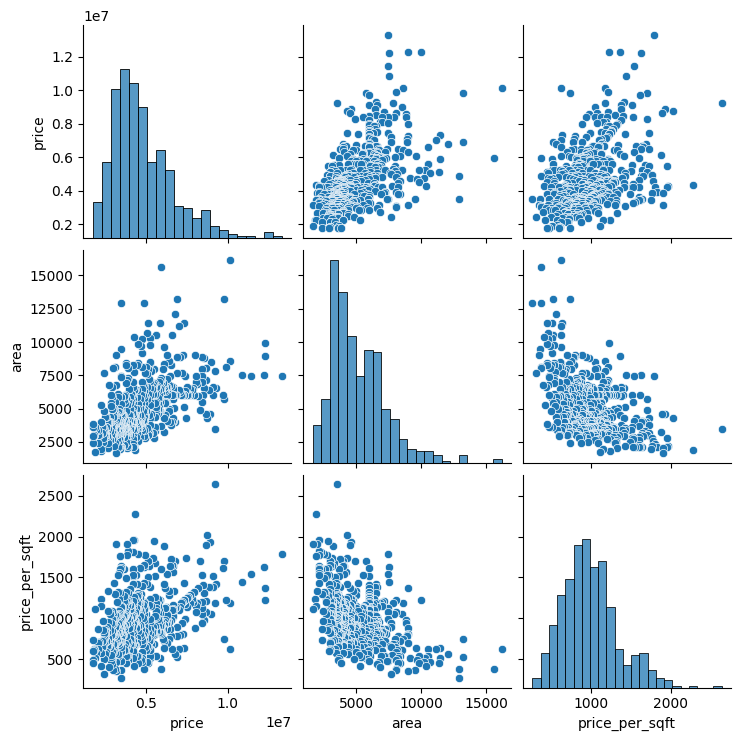

In [32]:
df["price_per_sqft"] = df["price"] / df["area"]
sns.pairplot(df, vars = ["price", "area", "price_per_sqft"])

There seems to be a positive correlation between price and price per square fit, which makes sense, but there are some points that don't follow that correlation as much, which is interisting. Could be because the even though the price per area is high, the house is very small, which makes the price still low. Another insight is the negative correlation between area and price per area, which is also expected since they are inversely proprotional.

# 6. Feature Interaction

In [33]:
df["bedxbath"] = df["bedrooms"] * df["bathrooms"]

df_corr = df[["bedxbath", "bedrooms", "bathrooms", "price"]].copy()
df_corr.corr()

,bedxbath,bedrooms,bathrooms,price
bedxbath,1.000000,0.699180,0.907528,0.535868
bedrooms,0.699180,1.000000,0.373930,0.366494
bathrooms,0.907528,0.373930,1.000000,0.517545
price,0.535868,0.366494,0.517545,1.000000


# 7. Combining Techniques

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  price_per_sqft    545 non-null    float64
 14  bedxbath          545 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 64.0+ KB


### Handle "price" outliers

In [35]:
print(max(df["price"]))

q3 = np.quantile(df["price"], 0.75)
q1 = np.quantile(df["price"], 0.25)
iqr = q3 - q1

lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

price = df["price"]

price = price[(price <= upper_range) & (price >= lower_range)]
print(max(price))
print(max(price) <= upper_range)

13300000
9100000
True


### Standarize all numeric features

In [36]:
scaler = StandardScaler()

columns = df.select_dtypes(include=np.number).columns.tolist()

df[columns] = scaler.fit_transform(df[columns])

print(df["price"])
print(df["area"])

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: price, Length: 545, dtype: float64
0      1.046726
1      1.757010
2      2.218232
3      1.083624
4      1.046726
         ...   
540   -0.991879
541   -1.268613
542   -0.705921
543   -1.033389
544   -0.599839
Name: area, Length: 545, dtype: float64


### Encode categorical variables

In [37]:
furnishing_ohe = pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus', drop_first=True)

df = pd.concat([df, furnishing_ohe], axis=1)
df = df.drop(["furnishingstatus"], axis=1)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_per_sqft,bedxbath,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,yes,2.308152,1.796477,False,False
1,4.004484,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,no,1.079838,5.347083,False,False
2,4.004484,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,yes,0.683361,0.908825,True,False
3,3.985755,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,yes,1.835081,1.796477,False,False
4,3.554979,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,no,1.572441,0.021173,False,False


In [38]:
encoder = LabelEncoder()

df["mainroad"] = encoder.fit_transform(df["mainroad"])
df["guestroom"] = encoder.fit_transform(df["guestroom"])
df["basement"] = encoder.fit_transform(df["basement"])
df["hotwaterheating"] = encoder.fit_transform(df["hotwaterheating"])
df["airconditioning"] = encoder.fit_transform(df["airconditioning"])
df["prefarea"] = encoder.fit_transform(df["prefarea"])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_per_sqft,bedxbath,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,2.308152,1.796477,False,False
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.079838,5.347083,False,False
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.683361,0.908825,True,False
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1.835081,1.796477,False,False
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1.572441,0.021173,False,False


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   mainroad                         545 non-null    int64  
 6   guestroom                        545 non-null    int64  
 7   basement                         545 non-null    int64  
 8   hotwaterheating                  545 non-null    int64  
 9   airconditioning                  545 non-null    int64  
 10  parking                          545 non-null    float64
 11  prefarea                         545 non-null    int64  
 12  price_per_sqft        

/tmp/ipykernel_6167/2634066045.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["furnishingstatus_semi-furnished"] = df["furnishingstatus_semi-furnished"].replace({True: 1, False: 0})
/tmp/ipykernel_6167/2634066045.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["furnishingstatus_unfurnished"] = df["furnishingstatus_unfurnished"].replace({True: 1, False: 0})


<Axes: >

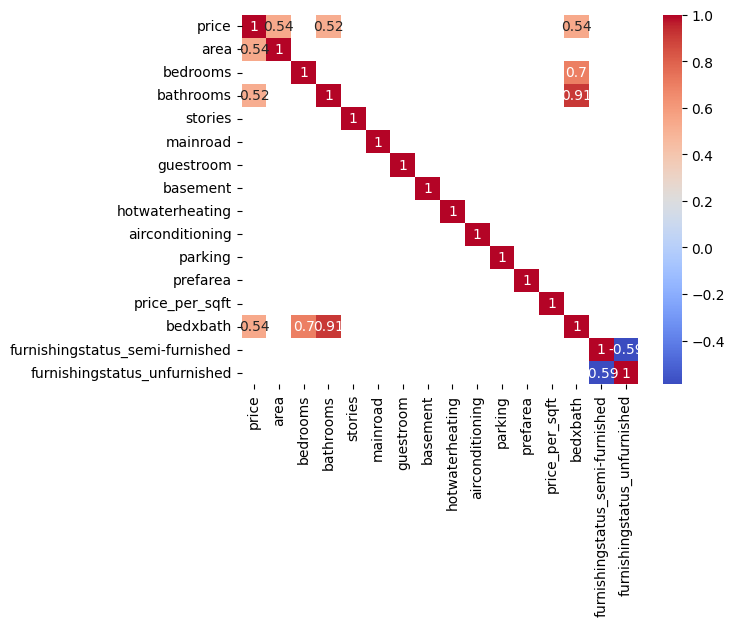

In [40]:
df["furnishingstatus_semi-furnished"] = df["furnishingstatus_semi-furnished"].replace({True: 1, False: 0})
df["furnishingstatus_unfurnished"] = df["furnishingstatus_unfurnished"].replace({True: 1, False: 0})

corr = df.corr()
filtered_corr = corr[(corr >= 0.5) | (corr <= -0.5)]
sns.heatmap(filtered_corr, cmap="coolwarm", annot=True)